In [1]:
from generating_clusters import class_e, class_d, class_c, class_b, class_a

from classifiers import map_classifier, ged, knn, med
from matplotlib import pyplot as plt
import numpy as np

xlims = (-10, 30)
ylims = (-10, 30)
dx = dy = 0.2

xx, yy = np.meshgrid(np.arange(*xlims, dx), np.arange(*ylims, dy))

# Create vectors to feed to classifier
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))
classes = [class_c, class_d, class_e]
# classes = [class_a, class_b]

In [2]:
# Classify grid
y_pred = []
for i in range(grid.shape[0]):
    x = grid[i, 0]
    y = grid[i, 1]
    # pred = map_classifier(x, y, classes)
    # pred = ged(x, y, classes)
    y_pred.append(pred)


NameError: name 'pred' is not defined

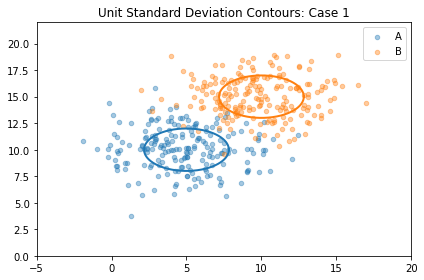

In [5]:
from ellipse import ellipse_points
# Plot filled contour
# zz = np.array(y_pred).reshape(xx.shape)
# plt.contour(xx, yy, zz, levels=list(range(len(classes))), cmap='Paired')

# Reset colours
plt.gca().set_prop_cycle(None)
ax = plt.gca()
classes = [class_a, class_b]
for c in classes:
    color = next(ax._get_lines.prop_cycler)['color']
    plt.scatter(c.x[0, :], c.x[1, :], c=color, label=f'{c.name}', s=20, alpha=0.4)
    plt.plot(*ellipse_points(c.mu, c.sigma), c=color, lw=2, zorder=3)
plt.legend()
plt.title('Unit Standard Deviation Contours: Case 1')
plt.xlim(-5, 20)
plt.ylim(0, 22)
plt.tight_layout()
plt.show()


In [85]:
from collections import Counter

def confusion_matrix(classes, classifier):
    """
    Generate confusion matrix of data in classes based on classifier
    """
    temp = []
    cm = np.zeros((len(classes), len(classes)))
    for c in classes:
        x = c.x
        output = []
        for i in range(x.shape[1]):
            output.append(classifier(x[0, i], x[1, i], classes))
        temp.append(Counter(output))
    for i, counter in enumerate(temp):
        for j, val in counter.items():
            cm[i, j] = val
    return cm

cm = confusion_matrix(classes, ged)

def error_rate(cm):
    """Compute error rate based on confusion matrix.
    Correct elements are on diagonal, incorrect are off diagonal
    So trace(cm) / sum(cm) is proportion correct, 1-correct is error rate
    """
    return 1 - (cm.trace() / cm.sum())

print(cm)
print(f'Error rate: {error_rate(cm)*100:.2f}%')

[[ 88.   6.   6.]
 [ 46. 145.   9.]
 [ 33.   4. 113.]]
Error rate: 23.11%


# Make the total plot for MED, MICD, MAP

In [13]:
# Classify grid
# classes = [class_c, class_d, class_e]
classes = [class_a, class_b]
y_med = []
y_micd = []
y_map = []
for i in range(grid.shape[0]):
    x = grid[i, 0]
    y = grid[i, 1]
    y_med.append(med(x, y, classes))
    y_micd.append(ged(x, y, classes))
    y_map.append(map_classifier(x, y, classes))


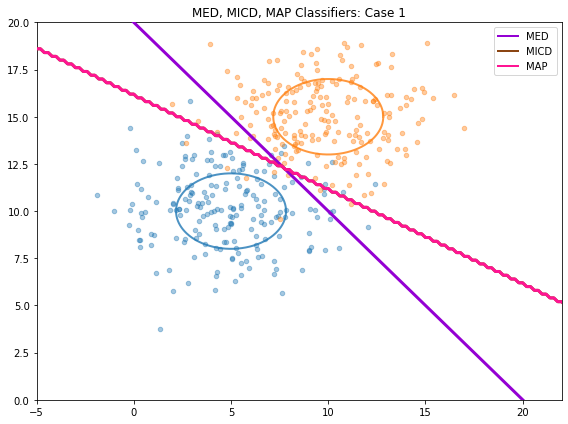

In [15]:
from ellipse import ellipse_points
from matplotlib.lines import Line2D
# Plot filled contours
fig, ax = plt.subplots(figsize=(8, 6))

colours = ['darkviolet', 'saddlebrown', 'deeppink']
names = ['MED', 'MICD', 'MAP']
for y_pred, colour in zip([y_med, y_micd, y_map], colours):
    zz = np.array(y_pred).reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=list(range(len(classes))), colors=colour, linewidths=3, zorder=3)

custom_lines = [Line2D([0], [0], color=c, lw=2) for c in colours]
ax.legend(custom_lines, names)

for c in classes:
    color = next(ax._get_lines.prop_cycler)['color']
    plt.scatter(c.x[0, :], c.x[1, :], c=color, label=f'{c.name}', s=20, alpha=0.4)
    plt.plot(*ellipse_points(c.mu, c.sigma), c=color, lw=2, zorder=2, alpha=0.8)
# plt.legend()

# Case 1
plt.title('MED, MICD, MAP Classifiers: Case 1')
plt.xlim(-5, 22)
plt.ylim(0, 20)
# Case 2
# plt.title('MED, MICD, MAP Classifiers: Case 2')
# # plt.xlim(-5, 25)
# # plt.ylim(-10, 27)
plt.tight_layout()
plt.show()
